In [146]:
# auto-reload modules when they have changed
%reload_ext autoreload
%autoreload 2

In [147]:
import matplotlib.pyplot as plt
import numpy as np
from modules.load import image
from config import config as cfg
from IPython.core.display import set_matplotlib_formats


In [148]:
img = image.load_from_path(cfg.image_FIDA_path)

In [149]:
vertical = img.data['APD1']
horizontal = img.data['APD2']

#diff = vertical - horizontal
diff = horizontal - vertical


/var/folders/2h/6xcys3mx1s7czfj28g_dc70r0000gn/T/ipykernel_64103/131811416.py:37: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


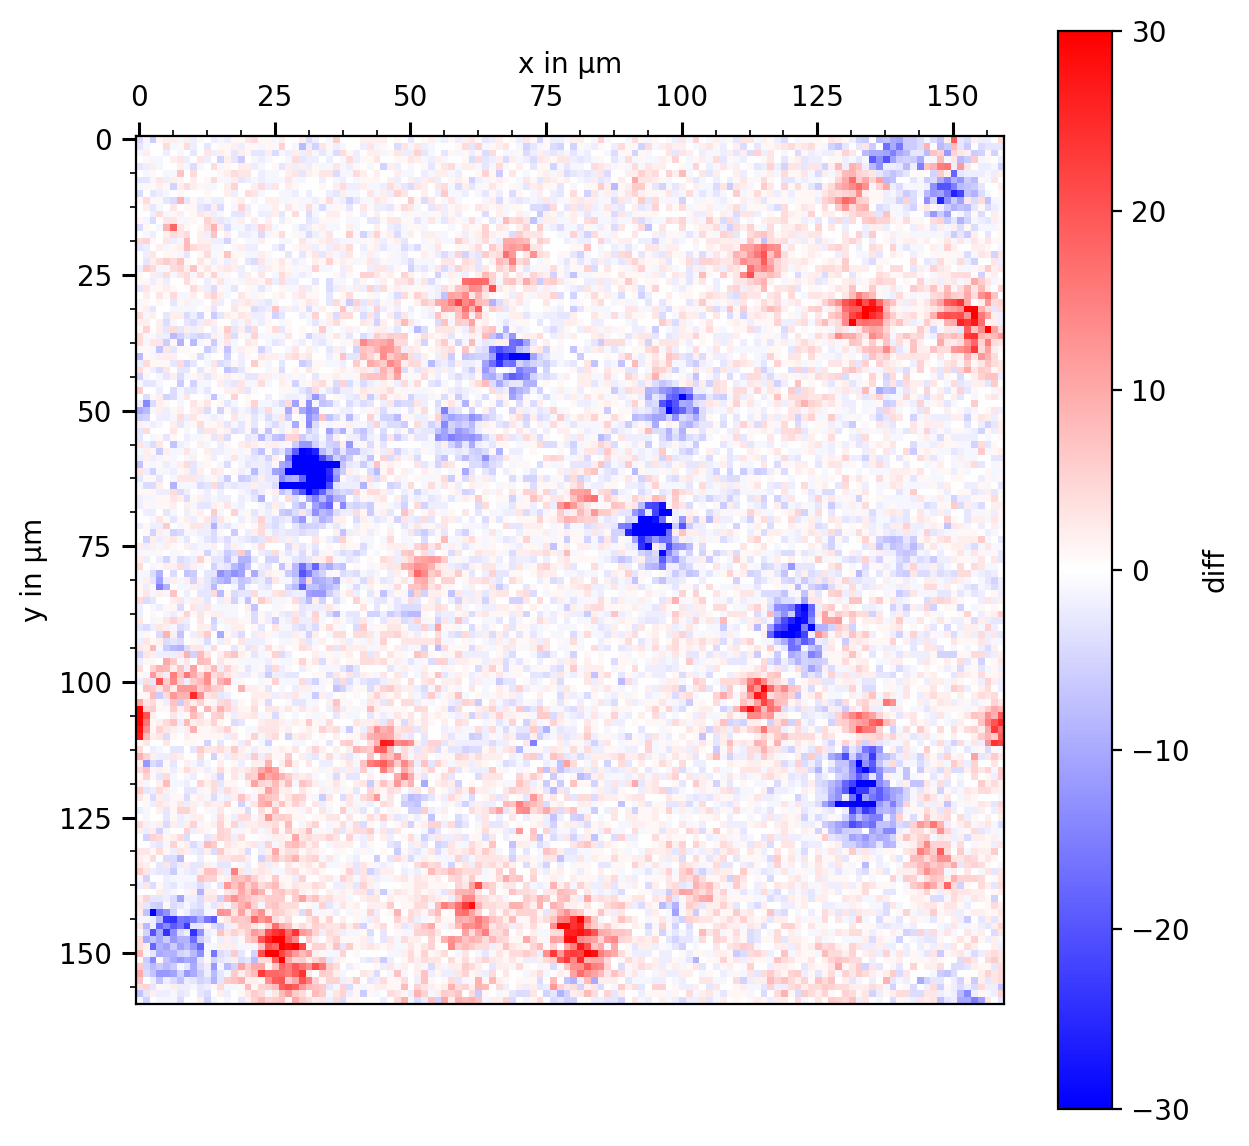

In [150]:
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(diff, cmap='bwr', vmin=-30, vmax=30)
cbar = fig.colorbar(im, label='diff')
    
# set major tick options
plt.tick_params(axis='both', 
                    which='major',
                    labelsize=10, 
                    labelbottom=False,
                    bottom=False, 
                    top=True, 
                    labeltop=True,
                    length=5, 
                    width=1.1)
    
# set minor tick options
plt.tick_params(axis='both', 
                    which='minor',
                    labelsize=10, 
                    labelbottom=False,
                    bottom=False, 
                    top=True, 
                    labeltop=True,
                    direction='out')
    
scaling_factor_x = (img.range_x*1e6)/img.pixel_x
scaling_factor_y = (img.range_y*1e6)/img.pixel_y
rounded_x_ticks = lambda x, _:'{:d}'.format(round(x*scaling_factor_x))
rounded_y_ticks = lambda y, _:'{:d}'.format(round(y*scaling_factor_y))

ax.xaxis.set_major_formatter(rounded_x_ticks)
ax.yaxis.set_major_formatter(rounded_y_ticks)

plt.minorticks_on()
plt.xlabel('x in µm')
plt.ylabel('y in µm')
set_matplotlib_formats('retina')
ax.xaxis.set_label_position('top')
plt.show()

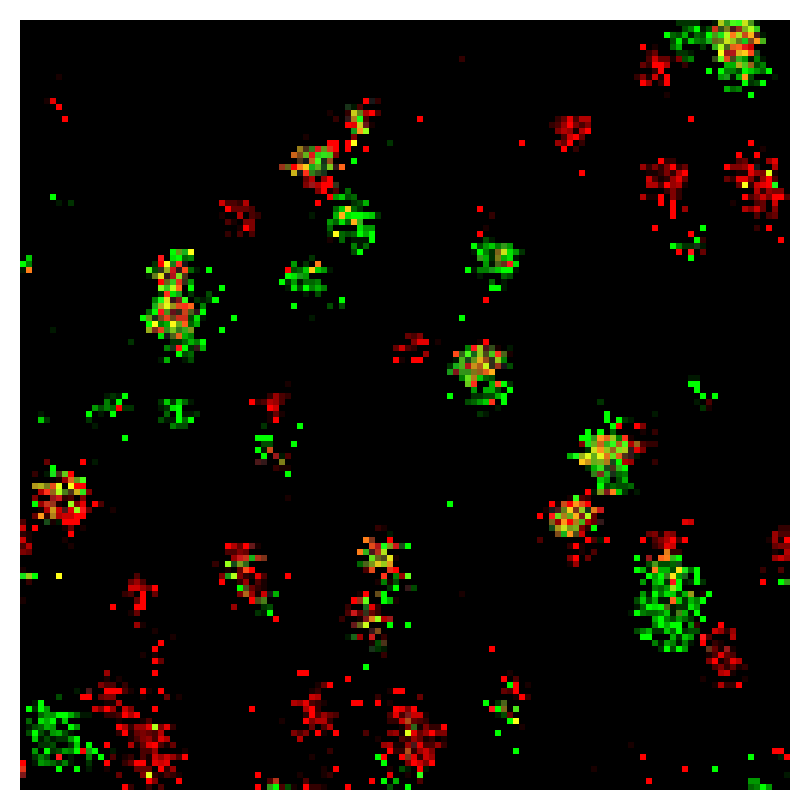

In [178]:
detector1 = vertical
detector2 = horizontal

# threshold
threshold = 10

# Compute the result image based on the two detectors
result = np.zeros((128, 128, 3))
result[:, :, 0] = np.where(horizontal < threshold, 0, horizontal) * 255/threshold  # Red channel
result[:, :, 1] = np.where(vertical < threshold, 0, vertical) * 255/threshold  # Green channel
result[:, :, 2] = np.logical_and( horizontal >= threshold, vertical >= threshold) * 255/threshold  # Yellow channel

# Plot the resulting image
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(result.astype(np.uint8))
ax.set_axis_off()
plt.show()

In [155]:
print(img.data['APD1'])
print(img.data['APD1'].shape)

print(img.data['APD1'][0][0])

[[ 5  3  7 ...  4  3  0]
 [ 5  1  2 ...  7  4  5]
 [ 4  2  2 ...  3  8  1]
 ...
 [11  0  3 ...  3  5 11]
 [ 9  4  2 ...  6  6  1]
 [ 2  8  2 ...  4  5  9]]
(128, 128)
5


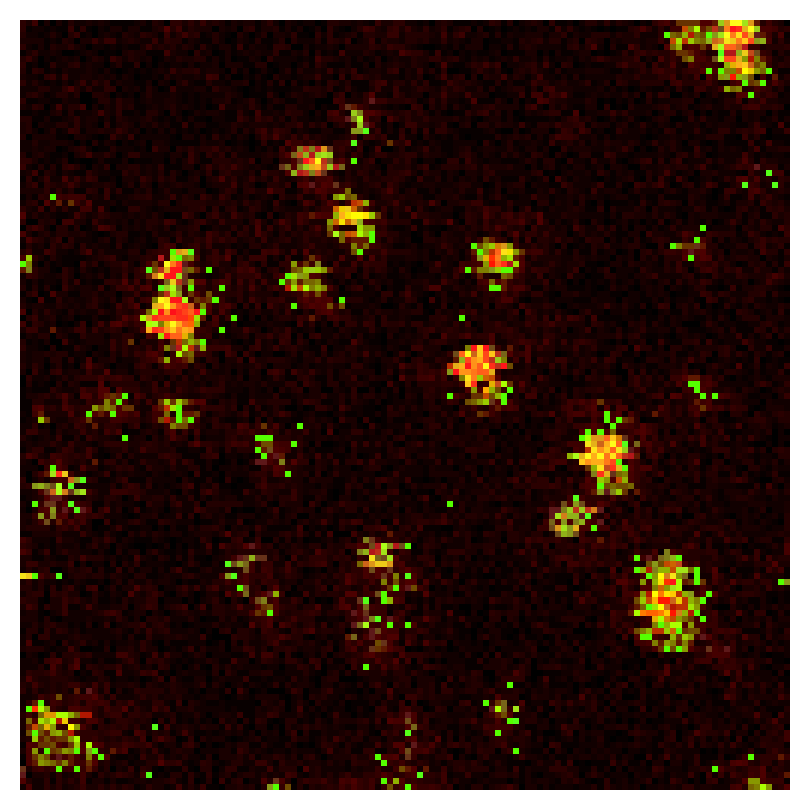

In [184]:
img_data01 = img.data['APD1']
img_data02 = img.data['APD2']

max01 = np.max(img_data01)
max02 = np.max(img_data02)

if max01 > max02:
    max_intensity = max01
else:
    max_intensity = max02

threshold = 30


'''# Iterate over every pixel in image
for i in range(img_data01.shape[0]):
    for j in range(img_data01.shape[1]):
        # If both detectors are above the threshold
        if img_data01[i, j] <= threshold and img_data02[i, j] <= threshold:
            # Set the pixel to yellow
            result[i, j, :] = [255 * img_data01[i, j], 255 * img_data01[i, j], 0] / max_intensity
         
        # If only the first detector is above the threshold
        if img_data01[i, j] <= threshold:
            # Set the pixel to red
            result[i, j, :] = [255 * img_data01[i, j] , 0, 0]  
        else:
            result[i, j, :] = [255, 0, 0]

        # If only the second detector is above the threshold
        if img_data02[i, j] <= threshold:
            # Set the pixel to green
            result[i, j, :] = [0, 255 * img_data02[i, j] / threshold, 0]
        # If neither detector is above the threshold
        else:
            # Set the pixel to black
            result[i, j, :] = [0, 255, 0]'''


# Iterate over every pixel in image
for i in range(img_data01.shape[0]):
    for j in range(img_data01.shape[1]):
        # If both detectors are above the threshold
        #if img_data01[i, j] <= threshold and img_data02[i, j] <= threshold:
            # Set the pixel to yellow
            #result[i, j, :] = [255 * img_data01[i, j] / threshold, 255 * img_data01[i, j] / threshold, 0]
        # If only the first detector is above the threshold
        if img_data01[i, j] <= threshold:
            # Set the pixel to red
            result[i, j, 0] = 255 * img_data01[i, j] / threshold
        
        elif img_data01[i, j] > threshold:
            result[i, j, 0] = 255

        # If only the second detector is above the threshold
        elif img_data02[i, j] <= threshold:
            # Set the pixel to green
            result[i, j, 1] = 255 * img_data02[i, j] / threshold 
            
        # If neither detector is above the threshold
        elif img_data02[i, j] > threshold:
            # Set the pixel to black
            result[i, j, 1] = 255
            

        

# Plot the resulting image
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(result.astype(np.uint8))
ax.set_axis_off()
plt.show()